In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Bad key "text.kerning_factor" on line 4 in
/home/vadim/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
churn_df = pd.read_csv("gym_data.csv")
churn_df.head()

,Row,Registration,Zipcode,Age,Partner_company,Friend_promo,Contract_period,Lifetime,Class_registration_weekly,Avg_additional_charges_total,Cancellation_freq,Exited,Unnamed: 12
0,10001,2000159,57328,37,0,1,6,10,1.06,134.200000,0.01,0,NaN
1,10002,2000235,29941,32,0,1,12,7,1.54,177.600000,0.07,0,NaN
2,10003,2000297,57328,29,0,1,6,5,2.15,205.000000,0.28,0,NaN
3,10004,2000435,29941,76,1,0,6,5,3.10,220.666667,0.39,0,NaN
4,10005,2000774,29941,24,1,0,1,3,1.00,142.040000,0.12,1,NaN


In [3]:
churn_df = churn_df[['Zipcode', 'Age', 'Partner_company', 'Friend_promo', 'Contract_period', 'Lifetime', 'Class_registration_weekly', 'Avg_additional_charges_total', 'Cancellation_freq','Exited']]
churn_df['Exited'] = churn_df['Exited'].astype('int')
churn_df.head()

,Zipcode,Age,Partner_company,Friend_promo,Contract_period,Lifetime,Class_registration_weekly,Avg_additional_charges_total,Cancellation_freq,Exited
0,57328,37,0,1,6,10,1.06,134.200000,0.01,0
1,29941,32,0,1,12,7,1.54,177.600000,0.07,0
2,57328,29,0,1,6,5,2.15,205.000000,0.28,0
3,29941,76,1,0,6,5,3.10,220.666667,0.39,0
4,29941,24,1,0,1,3,1.00,142.040000,0.12,1


In [4]:
X = np.asarray(churn_df[['Zipcode', 'Age', 'Partner_company', 'Friend_promo', 'Contract_period', 'Lifetime', 'Class_registration_weekly', 'Avg_additional_charges_total', 'Cancellation_freq']])
X[0:5]

array([[5.73280000e+04, 3.70000000e+01, 0.00000000e+00, 1.00000000e+00,
        6.00000000e+00, 1.00000000e+01, 1.06000000e+00, 1.34200000e+02,
        1.00000000e-02],
       [2.99410000e+04, 3.20000000e+01, 0.00000000e+00, 1.00000000e+00,
        1.20000000e+01, 7.00000000e+00, 1.54000000e+00, 1.77600000e+02,
        7.00000000e-02],
       [5.73280000e+04, 2.90000000e+01, 0.00000000e+00, 1.00000000e+00,
        6.00000000e+00, 5.00000000e+00, 2.15000000e+00, 2.05000000e+02,
        2.80000000e-01],
       [2.99410000e+04, 7.60000000e+01, 1.00000000e+00, 0.00000000e+00,
        6.00000000e+00, 5.00000000e+00, 3.10000000e+00, 2.20666667e+02,
        3.90000000e-01],
       [2.99410000e+04, 2.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 3.00000000e+00, 1.00000000e+00, 1.42040000e+02,
        1.20000000e-01]])

In [5]:
y = np.asarray(churn_df['Exited'])
y [0:5]

array([0, 0, 0, 0, 1])

In [6]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]


array([[ 1.11044375e+00, -1.61545522e-01, -1.01542763e+00,
         1.01442502e+00, -1.85447390e-01,  2.00449845e+00,
        -5.99384819e-01, -7.42309328e-01, -8.97815960e-01],
       [-9.09081545e-01, -6.13194952e-01, -1.01542763e+00,
         1.01442502e+00,  1.04714877e+00,  8.94365298e-01,
        -1.10177638e-03, -5.00607252e-03, -4.63072910e-01],
       [ 1.11044375e+00, -8.84184610e-01, -1.01542763e+00,
         1.01442502e+00, -1.85447390e-01,  1.54276529e-01,
         7.59216256e-01,  4.60480315e-01,  1.05852776e+00],
       [-9.09081545e-01,  3.36132003e+00,  9.84806762e-01,
        -9.85780105e-01, -1.85447390e-01,  1.54276529e-01,
         1.94331811e+00,  7.26634332e-01,  1.85555669e+00],
       [-9.09081545e-01, -1.33583404e+00,  9.84806762e-01,
        -9.85780105e-01, -1.21261086e+00, -5.85812239e-01,
        -6.74170199e-01, -6.09119063e-01, -1.00787036e-01]])

In [ ]:
# Import the necessary sklearn method
from sklearn.preprocessing import MinMaxScaler
# Instantiate a Min-Max scaling object
mm = MinMaxScaler()# Fit and transform our feature data into a pandas dataframe
X = pd.DataFrame(mm.fit_transform(X))

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=33)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6075, 9) (6075,)
Test set: (2025, 9) (2025,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(fit_intercept = False, C=1e12, solver='liblinear').fit(X_train,y_train)
LR

In [ ]:
yhat = LR.predict(X_test)
yhat

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.001, solver='newton-cg').fit(X_train,y_train)
LR
yhat = LR.predict(X_test)
yhat
yhat_prob = LR.predict_proba(X_test)
yhat_prob
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
LR2 = LogisticRegression(C=0.001, solver='sag').fit(X_train,y_train)
yhat = LR2.predict(X_test)
yhat
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
LR2 = LogisticRegression(C=0.001, solver='lbfgs').fit(X_train,y_train)
yhat = LR2.predict(X_test)
yhat
yhat_prob3 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob3))

In [8]:
rf = RandomForestClassifier(n_estimators=100, max_depth=20,
                              random_state=42)
rf.fit(X_train, y_train) 
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)
yhat = rf.predict(X_test)
yhat
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  1.000
Test set accuracy:  0.978


In [9]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/home/vadim/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.9777777777777777

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 452   29]
 [  16 1528]]


Confusion matrix, without normalization
[[ 452   29]
 [  16 1528]]


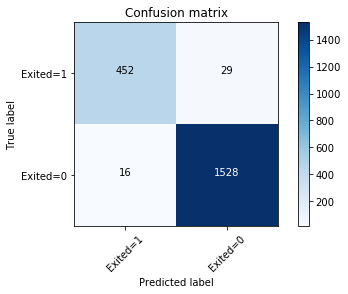

In [11]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Exited=1','Exited=0'],normalize= False,  title='Confusion matrix')

In [12]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1544
           1       0.97      0.94      0.95       481

    accuracy                           0.98      2025
   macro avg       0.97      0.96      0.97      2025
weighted avg       0.98      0.98      0.98      2025



In [13]:
churn = pd.read_csv("gym_test.csv")

In [14]:
churn = churn[['Zipcode', 'Age', 'Partner_company', 'Friend_promo', 'Contract_period', 'Lifetime', 'Class_registration_weekly', 'Avg_additional_charges_total', 'Cancellation_freq']]
X = np.asarray(churn[['Zipcode', 'Age', 'Partner_company', 'Friend_promo', 'Contract_period', 'Lifetime', 'Class_registration_weekly', 'Avg_additional_charges_total', 'Cancellation_freq']])

In [15]:
from sklearn import preprocessing
XX_test = preprocessing.StandardScaler().fit(X).transform(X)

In [ ]:
# Import the necessary sklearn method
from sklearn.preprocessing import MinMaxScaler
# Instantiate a Min-Max scaling object
mm = MinMaxScaler()# Fit and transform our feature data into a pandas dataframe
XX_test = pd.DataFrame(mm.fit_transform(X))

In [16]:
df = pd.read_csv("gym_test.csv")

In [17]:
yhat = rf.predict(XX_test)

df['Exited'] = yhat
df.to_csv('submission.csv',index=False)
